In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import matplotlib as mpl
from scipy.optimize import curve_fit

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,12)))
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)

runstr='Dry'
dftab=pd.read_pickle('../dfs/df_run_02_dry_delta_tab.pkl')
df=pd.read_pickle('../dfs/df_run_02_dry.pkl')

# runstr='Wet'
# dftab=pd.read_pickle('../dfs/df_run_02_land_delta_tab.pkl')
# df=pd.read_pickle('../dfs/df_run_02_land.pkl')

f=2*np.sin(30*(np.pi/180))*7.2921150E-5 #coriolis number
fs=8 #font size
dftab['tal']=round((dftab.t-dftab.tlf)*24,2)
dftab['r']=round(dftab['r'],3)
dftab['rV10max']=round(dftab['rV10max'],3)
r0=dftab.r.unique()[0]

df['tal']=round((df.t-df.tlf)*24,2)

In [53]:
class Var:
    def __init__(self,vid,vdat,vlab):
        self.id=vid
        self.dat=vdat
        self.lab=vlab

class Pltdat:
    def __init__(self,x,y,eq):
        self.x=x
        self.y=y
        self.eq=eq
        

def fit_thalf_exp(t,y,ylab,ax=False):
    ly = np.log(y)
    K, A_log = np.polyfit(t, ly, 1)
    A = np.exp(A_log)
    thalf=-np.log(2)/K
    yf=np.exp(A_log+t*K)
    
    if ax:
        ax.plot(t*24,y,'k')
        ax.plot(t*24,yf,'--r')
        ax.grid(True)
        ax.set_title('t$_{lf}$='+str(tlf))
        ax.set_xlabel('t (h)')
        ax.set_ylabel(ylab)
        ax.set_xlim((0,12))        
    return(thalf)

# def fit_thalf_alg(t,y,ylab,ax=False):
#     def algd(x,k,a):
#         return(1/(k*x+a))
# #     print(t)
# #     t=t-t.values[0]
#     pa0=[0.07602148, 0.01205749]
#     fita,fitcova=curve_fit(algd,t,y,p0=pa0)
#     thalf=fita[1]/fita[0]
#     yf=algd(t,fita[0],fita[1])
# #     print(fita) 
#     if ax:
#         ax.plot(t*24,y,'k')
#         ax.plot(t*24,yf,'--r')
#         ax.grid(True)
#         ax.set_title('t$_{lf}$='+str(tlf))
#         ax.set_xlabel('t (h)')
#         ax.set_ylabel(ylab)
#         ax.set_xlim((0,12))
#         ax.set_ylim((0,0.1))
#     return(thalf)

Getting vars
plotting time series


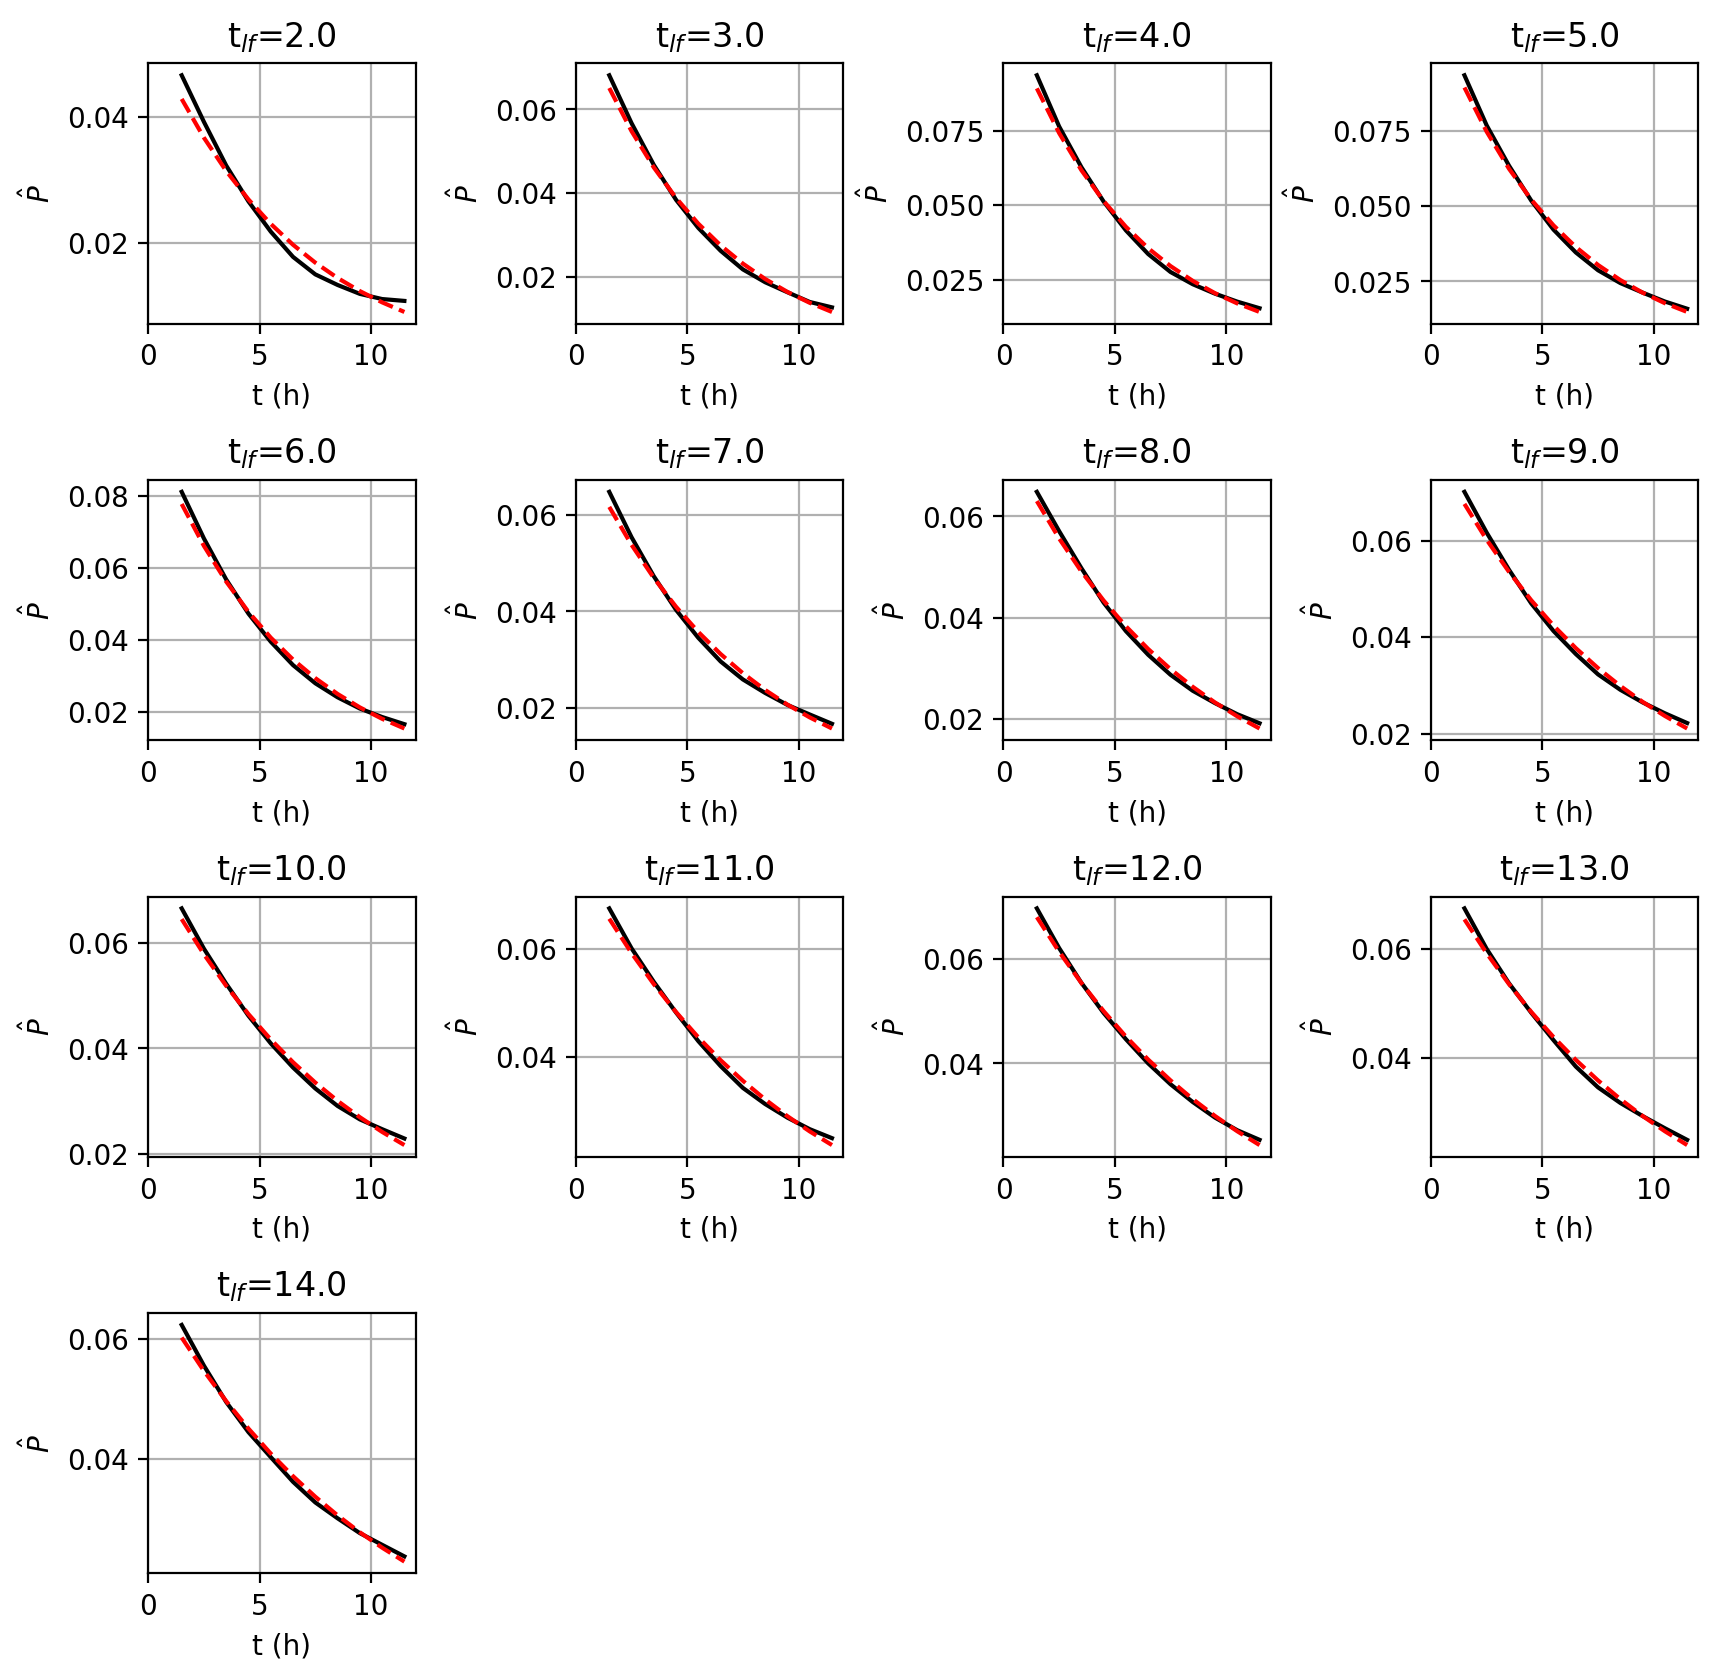

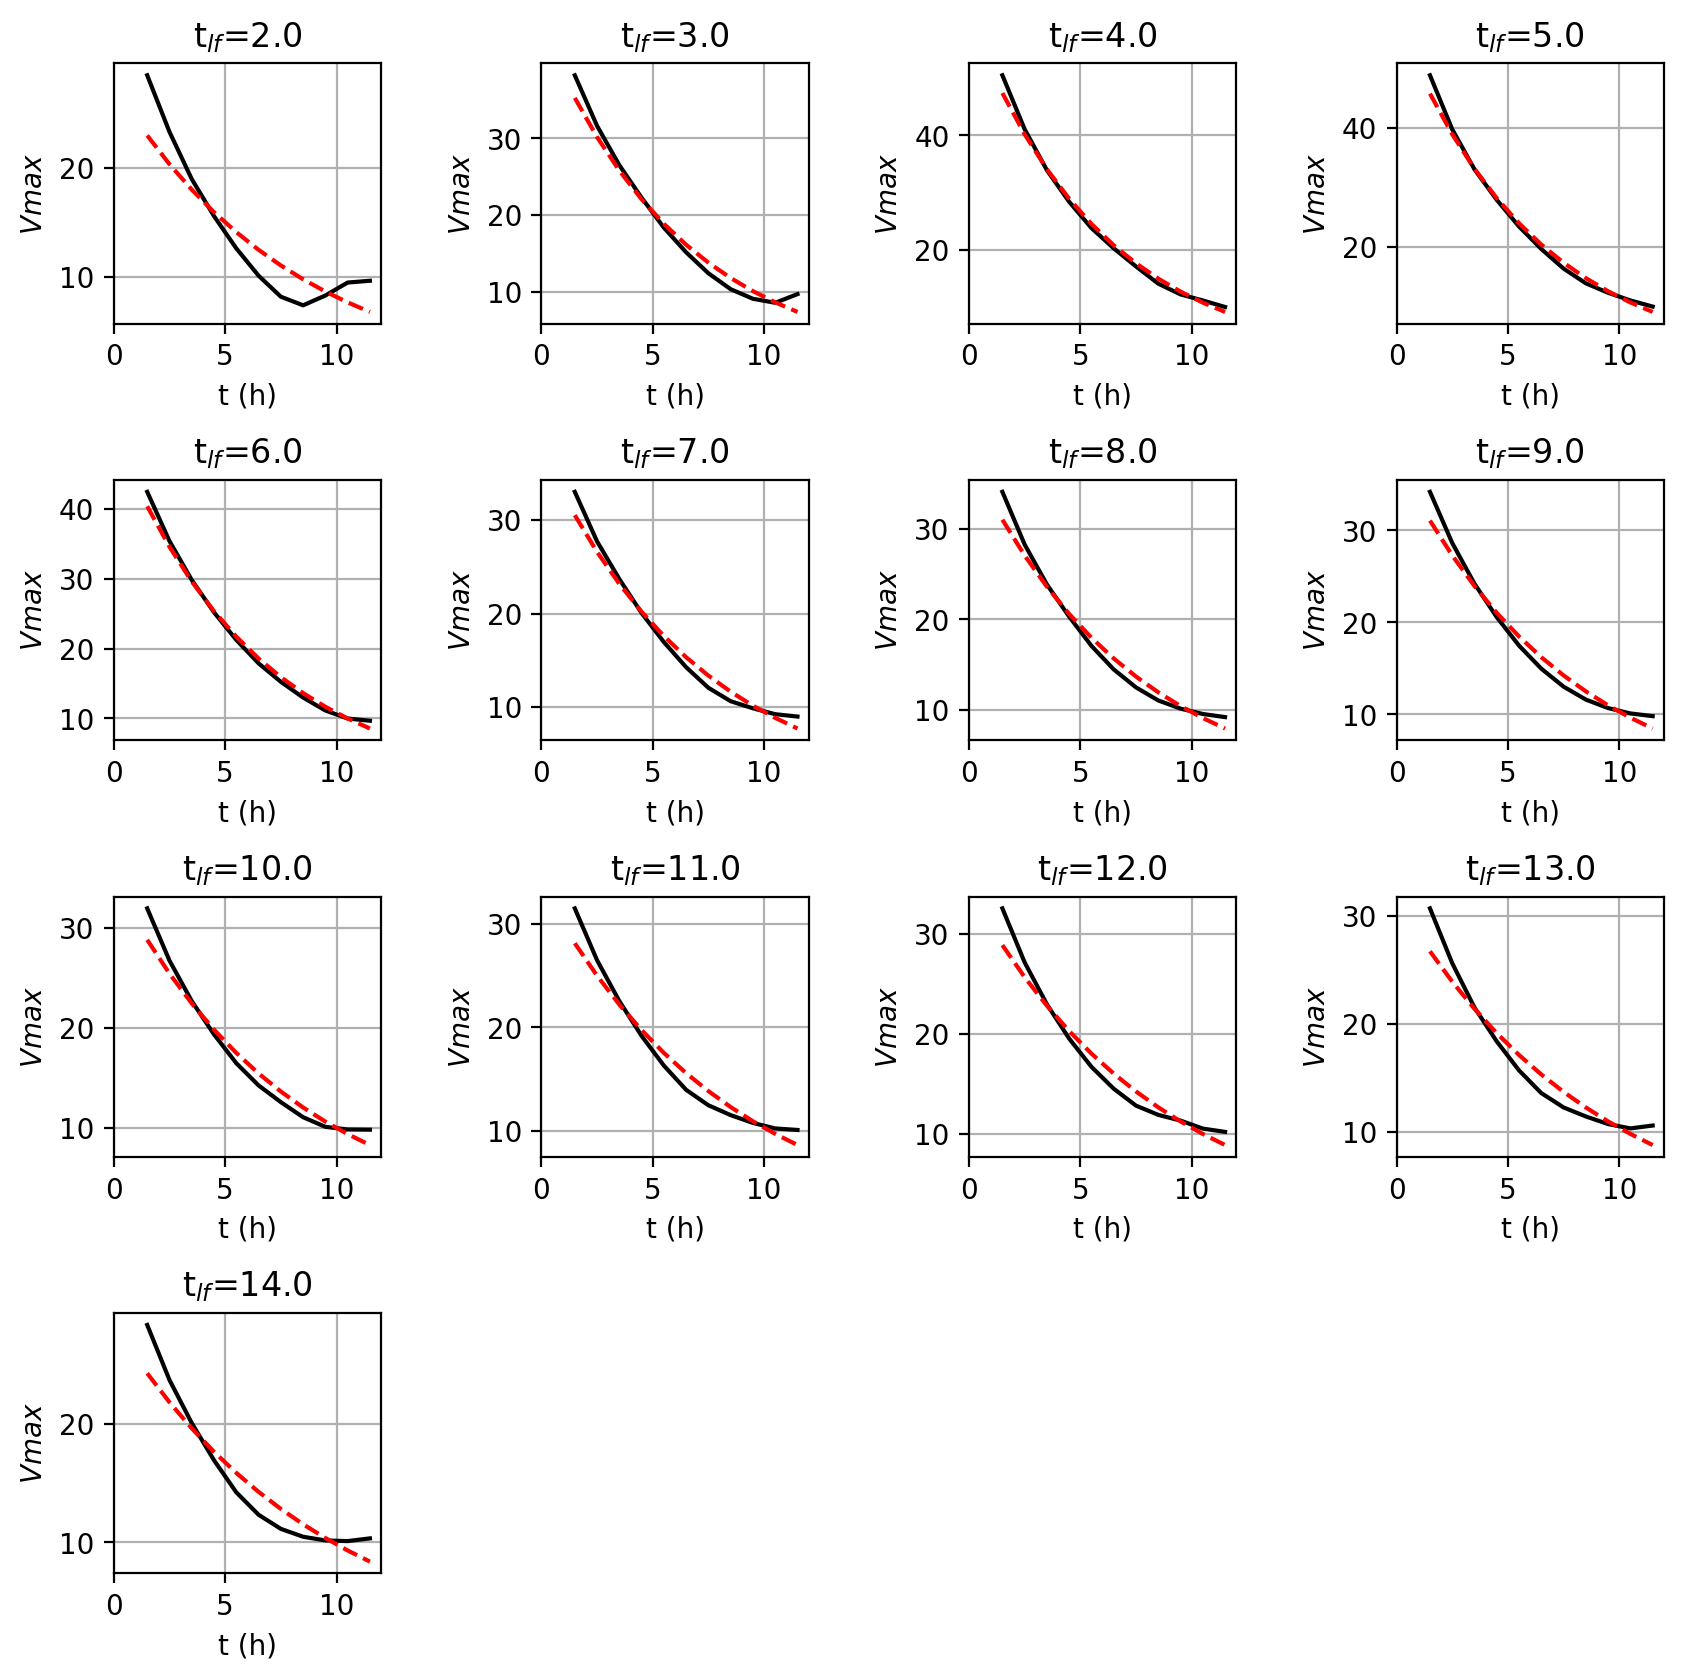

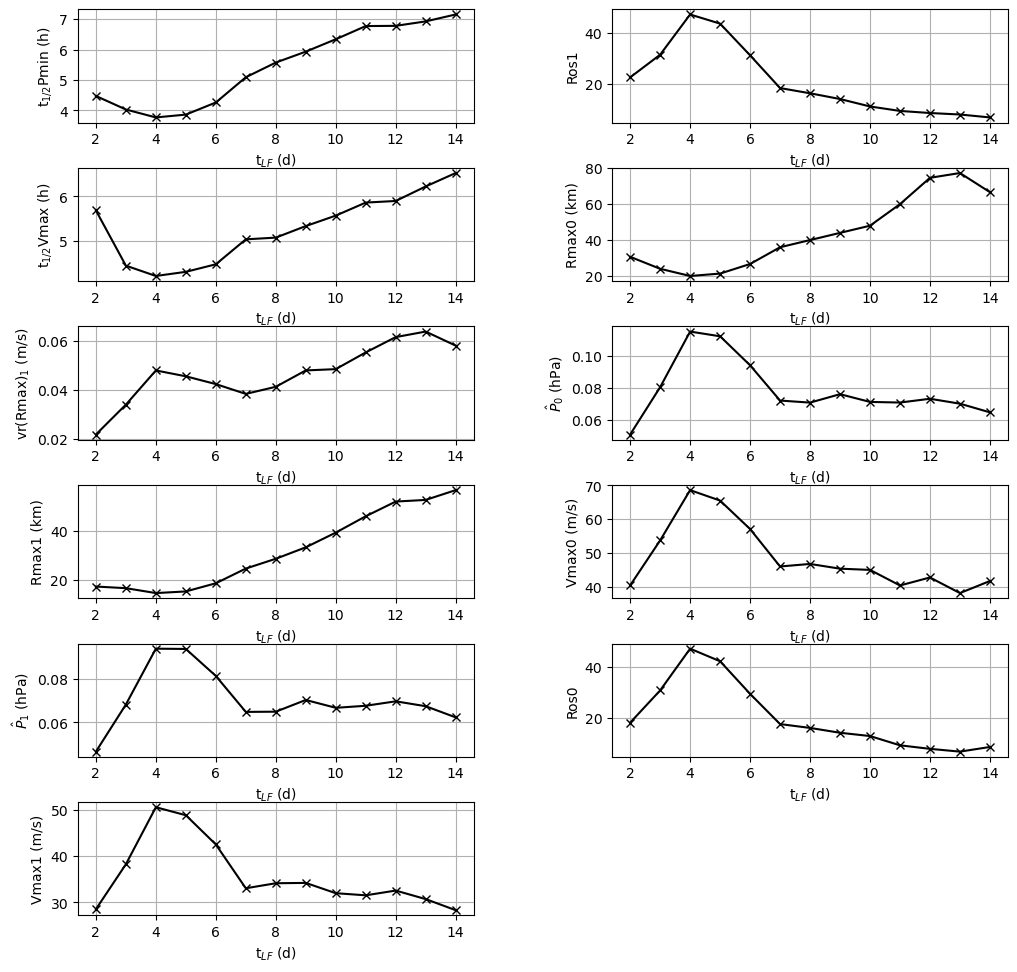

In [54]:
figs=[]; axss=[]
for i in range(2):
    fig,axs=plt.subplots(4,4,sharex=False,dpi=200,figsize=(10,10))
    plt.subplots_adjust(hspace=0.6,wspace=0.6)
    for i in range(13,len(axs.flat)):
        axs.flat[i].axis('off')
    figs.append(fig)
    axss.append(axs)
       
fig5,axs5=plt.subplots(6,2,sharex=False,dpi=100,figsize=(12,12))
plt.subplots_adjust(hspace=0.4,wspace=0.35)
for i in range(11,len(axs5.flatten(order='F'))):
    axs5.flatten(order='F')[i].axis('off')

thP=[];thV=[];k_VrPhat=[];vrRmax1=[]
Rmax0=[];Pmin0=[];Vmax0=[];Ros0=[]
Rmax1=[];Pmin1=[];Vmax1=[];Ros1=[]

Pe=1016
tmind=1
tmaxd=12
tmina=1
tmaxa=12
# k=2

tlfs=dftab.tlf.unique()
# tlfs=np.delete(tlfs,11)

print('Getting vars')
for n,tlf in enumerate(tlfs):
    
    df0=df.query('tlf==@tlf & tal==0').iloc[0]
    Pmin0.append(df0.Pmin)
    Rmax0.append(df0.rV10max)
    Vmax0.append(df0.V10max)
    Ros0.append(Vmax0[-1]/(1000*Rmax0[-1]*f))
    
    
    # get 'initial' params
    df1=dftab.query('tlf==@tlf & tal==1.5')
    df1=df1.iloc[np.argmin((df1.r-df1.rV10max).abs())]
    rmax_tlf=df1.r

    Pmin1.append(df1.Pmin)
    Rmax1.append(df1.rV10max)
    Vmax1.append(df1.V10max)
    Ros1.append(Vmax1[-1]/(1000*Rmax1[-1]*f))
        
    # get vr
    df1=dftab.query('tlf==@tlf & tal==1.5')
    df1=df1.iloc[np.argmin((df1.r-df1.rV10max).abs())]
    vrRmax1.append(df1.vrcol)

    # fit decay
    dfdt=dftab.query('tlf==@tlf & r == @r0 & tal>=@tmind & tal <= @tmaxd')     
    thP.append(24*fit_thalf_exp(dfdt.tal/24,(Pe-dfdt.Pmin)/Pe,ax=axss[0].flat[n],ylab='$\hat{P}$'))
    thV.append(24*fit_thalf_exp(dfdt.tal/24,dfdt.V10max,ax=axss[1].flat[n],ylab='$Vmax$'))
    
    
Pmin0=np.array(Pmin0)
Vmax0=np.array(Vmax0)
Rmax0=np.array(Rmax0)
Ros0=np.array(Ros0)
Pmin1=np.array(Pmin1)
Vmax1=np.array(Vmax1)
Rmax1=np.array(Rmax1)
Ros1=np.array(Ros1)

Phat0=(Pe-Pmin0)/Pe
Phat1=(Pe-Pmin1)/Pe


vars=[
    Var('thP',thP,'t$_{1/2}$Pmin (h)'),
    Var('thV',thV,'t$_{1/2}$Vmax (h)'), 
 
    Var('vrRmax1',vrRmax1,'vr(Rmax)$_1$ (m/s)'),

    Var('Rmax1',Rmax1,'Rmax1 (km)'),
    Var('Phat1',Phat1,'$\hat{P}_1$ (hPa)'),
    Var('Vmax1',Vmax1,'Vmax1 (m/s)'),
    Var('Ros1',Ros1,'Ros1'),
    
    Var('Rmax0',Rmax0,'Rmax0 (km)'),
    Var('Phat0',Phat0,'$\hat{P}_0$ (hPa)'),
    Var('Vmax0',Vmax0,'Vmax0 (m/s)'),
    Var('Ros0',Ros0,'Ros0'),
]

vd = {var.id: var for var in vars}

print('plotting time series')
axsf=axs5.flatten(order='F')
for ax,d in zip(axsf,vars):
    plot_ts(ax,d)

plotting scatters


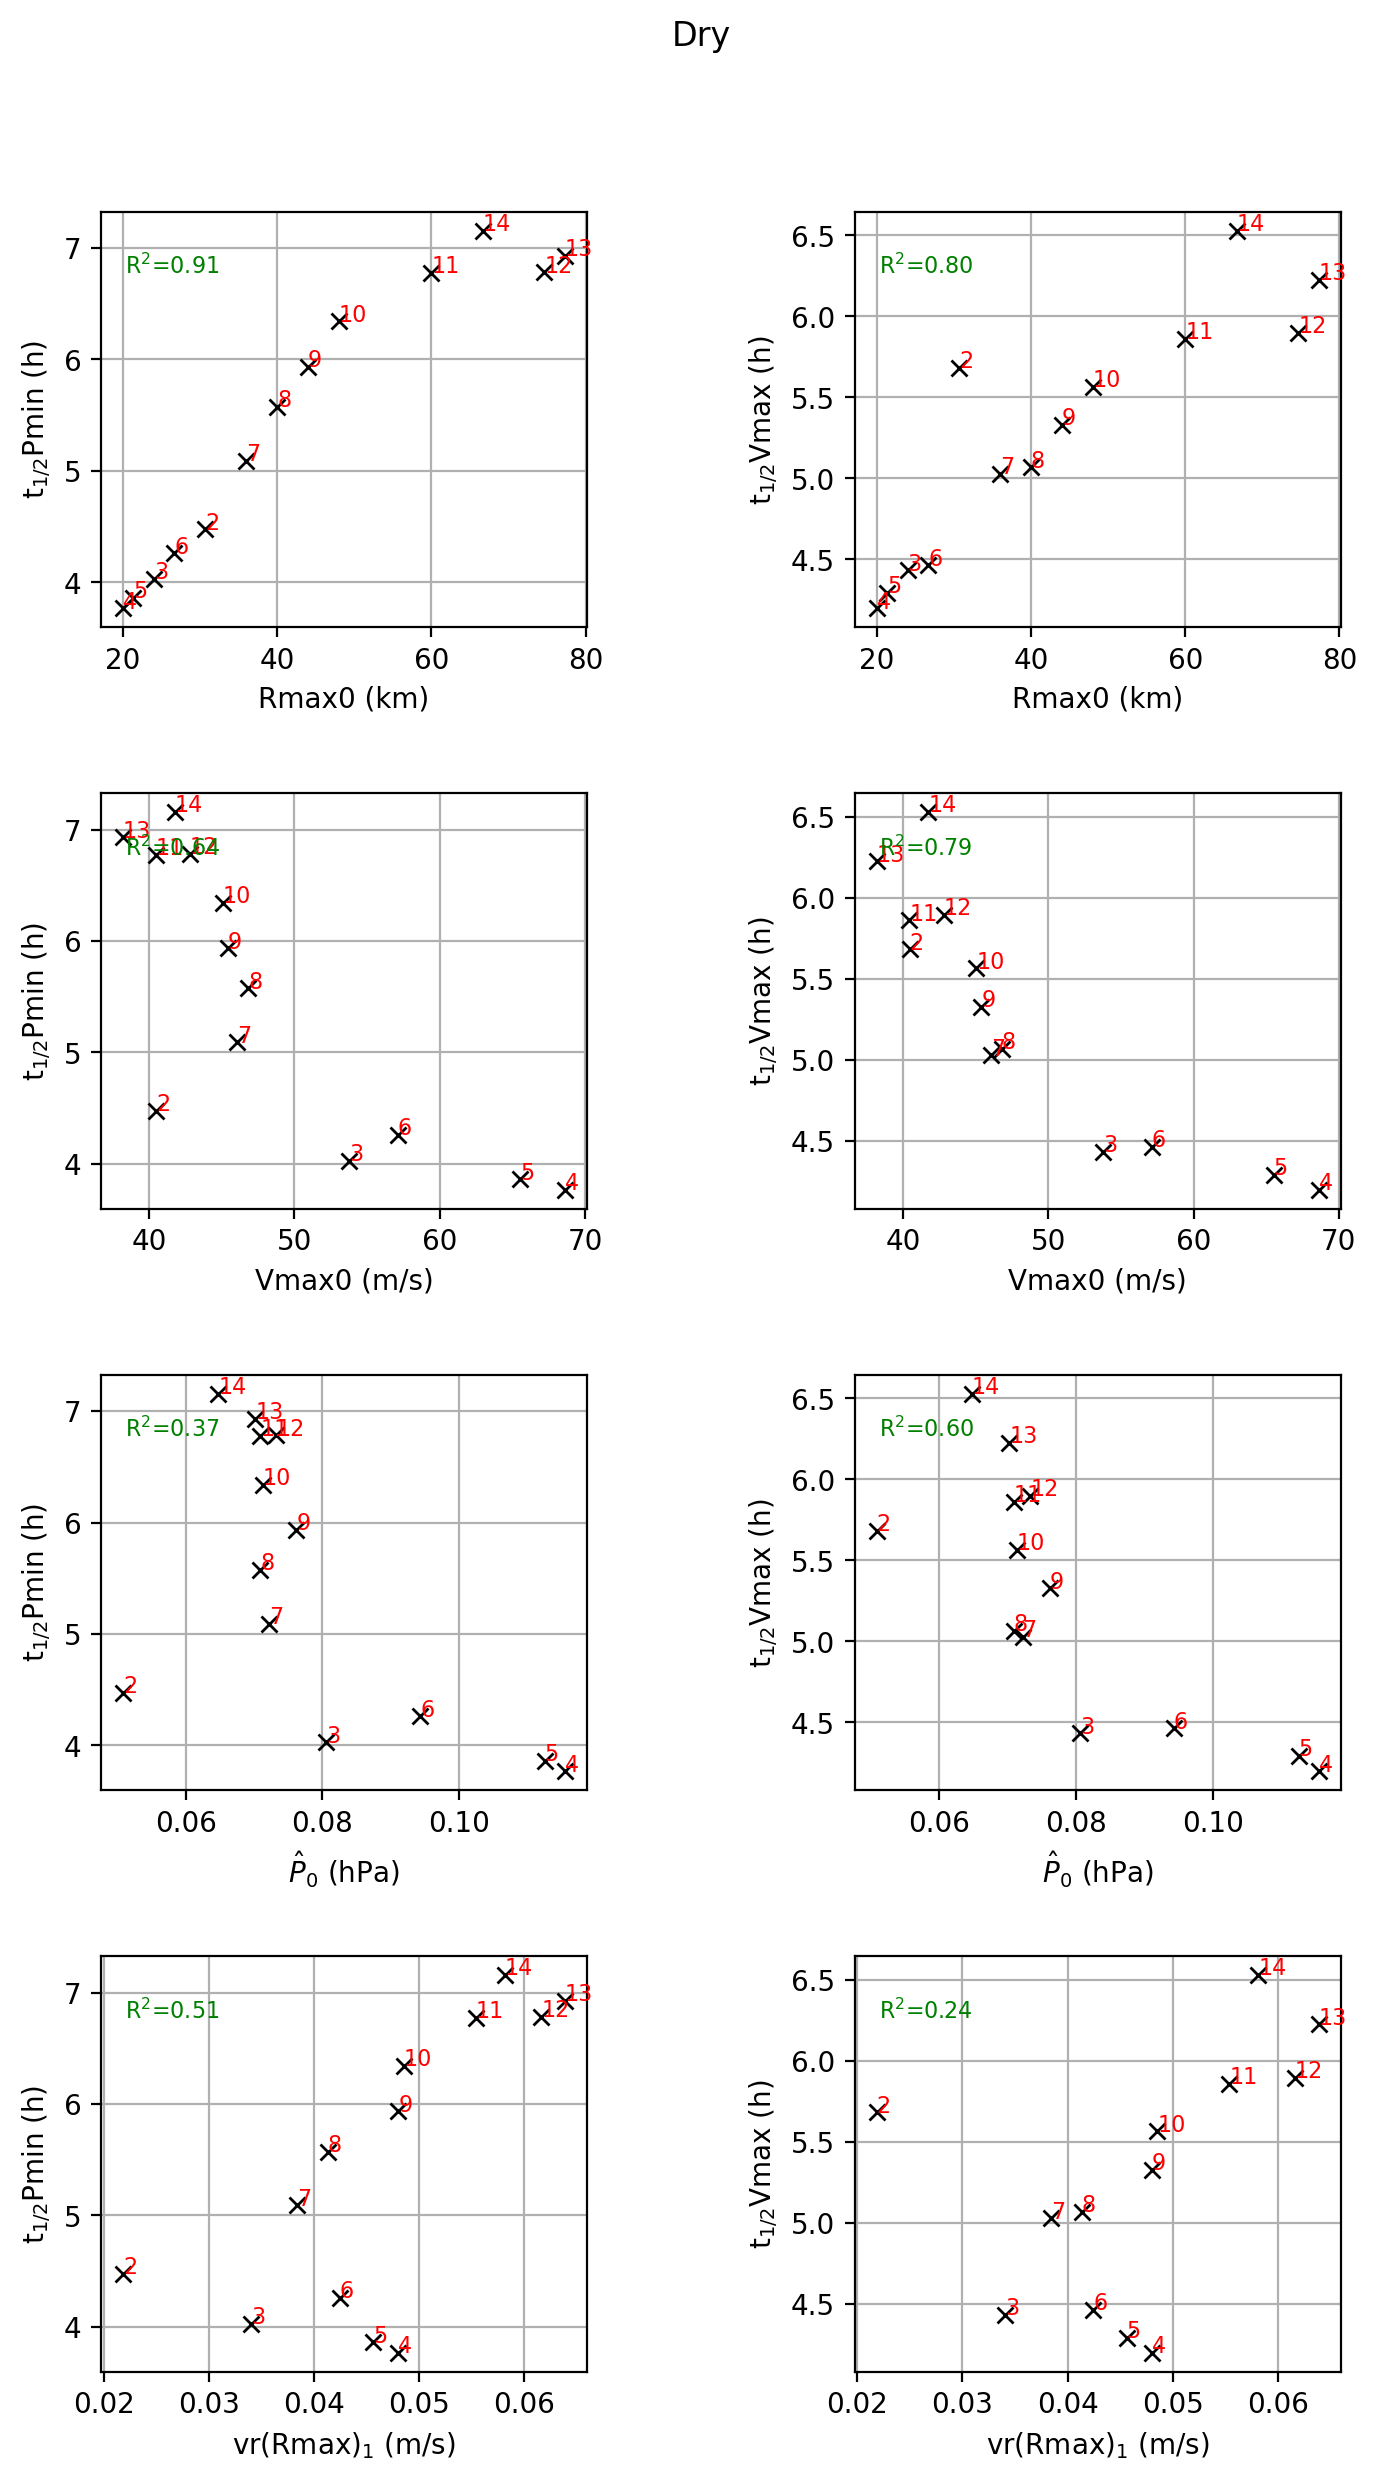

In [55]:
def plot_scat(ax,d):
    ax.plot(d.x.dat,d.y.dat,'xk')
    ax.grid(True)
    ax.set_xlabel(d.x.lab)
    ax.set_ylabel(d.y.lab)
    for tlf,x,y in zip(tlfs,d.x.dat,d.y.dat):
        ax.text(x,y,round(tlf),fontsize=fs,color='r')
    r2=np.corrcoef(d.x.dat,d.y.dat)[0,1]**2
    ax.text(0.05,0.85,"R$^2$={:2.2f}".format(r2),transform=ax.transAxes,fontsize=fs,color='g')
    if d.eq:
        axr=[np.min((d.x.dat,d.y.dat)),np.max((d.x.dat,d.y.dat))]
        axr[0]=axr[0]-0.1*(axr[1]-axr[0])
        axr[1]=axr[1]+0.1*(axr[1]-axr[~0])
        ax.plot(axr,axr,':k')
        ax.set_xlim(axr)
        ax.set_ylim(axr)
        
print('plotting scatters')
fs=8
fig,axs=plt.subplots(4,2,dpi=200,figsize=(8,12))
plt.subplots_adjust(hspace=0.4,wspace=0.55,top=.9,bottom=0)
# for i in range(2,3):
#     axs.flatten()[i].axis('off')
        
pltdats=(
    Pltdat(vd['Rmax0'],vd['thP'],False),
    Pltdat(vd['Rmax0'],vd['thV'],False),
    
    Pltdat(vd['Vmax0'],vd['thP'],False),
    Pltdat(vd['Vmax0'],vd['thV'],False),
        
    Pltdat(vd['Phat0'],vd['thP'],False),
    Pltdat(vd['Phat0'],vd['thV'],False),
    
    Pltdat(vd['vrRmax1'],vd['thP'],False),
    Pltdat(vd['vrRmax1'],vd['thV'],False), 
    
)

# axs=np.delete(axs.flatten(),[2])
for ax,pltdat in zip(axs.flatten(),pltdats):
    plot_scat(ax,pltdat)
plt.suptitle(runstr);
for i in range(len(pltdats),len(axs.flat)):
    axs.flat[i].axis('off')